## Problem Statement & Justification
### Problem Statement
Farmers often struggle to determine which crop is best suited for their land due to varying soil compositions and unpredictable weather conditions. Without access to expert agricultural advice, many rely on traditional knowledge or trial-and-error methods, which can lead to suboptimal yields and wasted resources.
The objective of this project is to develop a machine learning-based crop recommendation system. Given soil nutrient levels (N, P, K), environmental conditions (temperature, humidity, rainfall), and soil pH, the system predicts the most suitable crop to cultivate from a predefined list of 22 crops.
### Justification for the Proposed Approach
- **Reduces Uncertainty:** Farmers often lack reliable, localized recommendations. A data-driven model helps reduce decision uncertainty by providing personalized, accurate guidance.
- **Promotes Sustainable Farming:** Matching crops to soil and climate conditions promotes better use of land and water, helping to preserve soil health and optimize input usage.
- **Harnesses Historical Data:** The model leverages patterns found in historical data to identify crop suitability more reliably than intuition or generalized advice.
- **Scalable and Replicable:** Once trained, the model can be deployed in mobile applications or decision support tools, scaling support to millions of farmers with minimal additional cost.
- **Addresses Global Challenges:** With increasing pressure on global food systems, such tools support climate-smart agriculture and resilience in developing economies.

This project aligns with sustainable development goals by helping improve agricultural productivity, ensure food security, and support farmer livelihoods through accessible AI tools.

## Crop Prediction EDA

In [17]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from ydata_profiling import ProfileReport

# Set agg.path.chunksize to a higher value
mpl.rcParams['agg.path.chunksize'] = 10000

sns.set()

## Data exploration

In [ ]:

data = pd.read_csv("../datasets/Crop_recommendation.csv")
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

## Profile Report

In [8]:
profile = ProfileReport(data, title="Profile Report")
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


## Data Distribution

<Axes: title={'center': 'Average Crop Yield by Type'}, xlabel='label'>

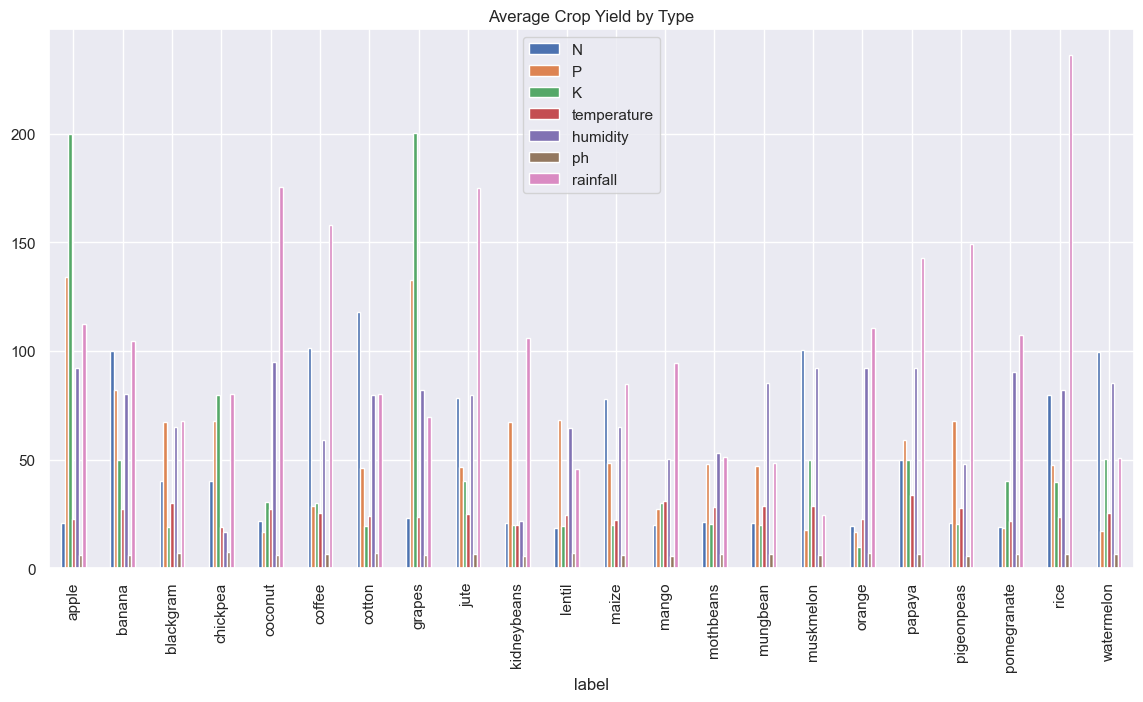

In [20]:

data.groupby("label").mean().plot(kind="bar", title="Average Crop Yield by Type", figsize=(14,7))


In [21]:
data.info()
data["crop"] = data["label"].astype("category").cat.codes

crop_df = data.drop(columns=["label"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


## Feature Correlation

The correlation matrix displays the linear relationships between the features in the crop dataset.  These correlations can help identify which features are most influential for crop prediction and may guide feature selection or engineering. Assuming that these features are correlated to the type of crop selected, we wanted to understand they relate to each other.

Key observations include:
- Strong positive correlation between Phosphorus (P) and Potassium (K) (0.74), indicating these nutrients often increase together in the dataset.
- Humidity and temperature are moderately positively correlated (0.21)
- Most other feature pairs show weak correlations, indicating relative independence.

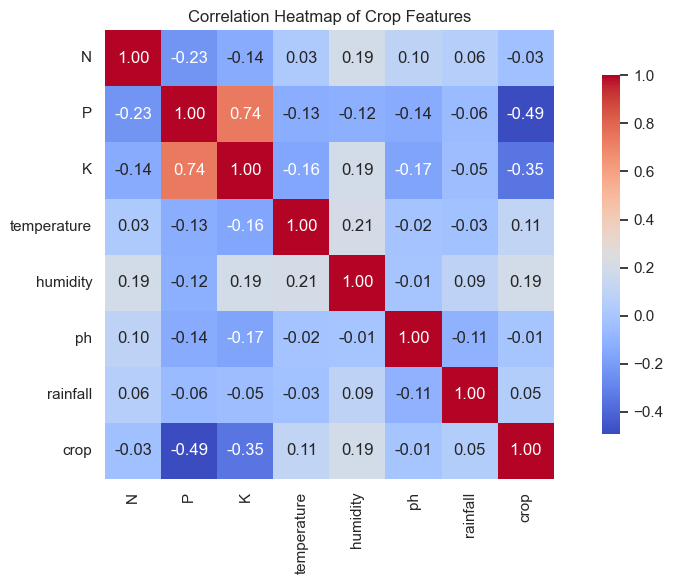

In [22]:
corr = crop_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap of Crop Features")
plt.tight_layout()
plt.show()


## Feature Distribution

The following section visualizes the distribution of each feature in the dataset, grouped by crop type. By examining these distributions, we can identify patterns, outliers, and the range of values for each feature across different crops. This helps in understanding which features are most discriminative for crop classification and may reveal relationships or separations between crop types based on soil nutrients, environmental conditions, and other variables.


The visualizations (histograms and bar plots) provide insights into the distribution of crop types and their relationship with various features:
1. **Distirbution Pattern:
- The dataset appears to have roughly equal numbers of samples for most crops
- This suggests intentional balancing during dataset creation
- Each crop type likely has around 100 samples (approximately 4.5% of the dataset)

2. **Impact on Modeling
- The relatively balanced nature of the dataset is advantageous for model training
- No need for advanced resampling techniques like SMOTE or class weights
- Model metrics should be equally representative across all crop types


The visualizations confirm that the dataset contains a diverse set of crops with varying feature distributions. Some features, such as phosphorus (P) and potassium (K), show strong correlations and may be key drivers in crop recommendation. 


/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_28939/355478250.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


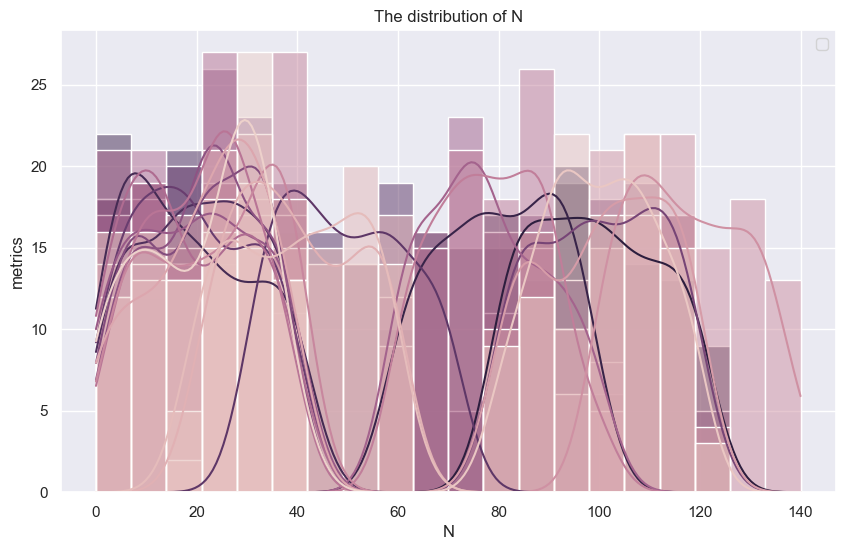

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_28939/355478250.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


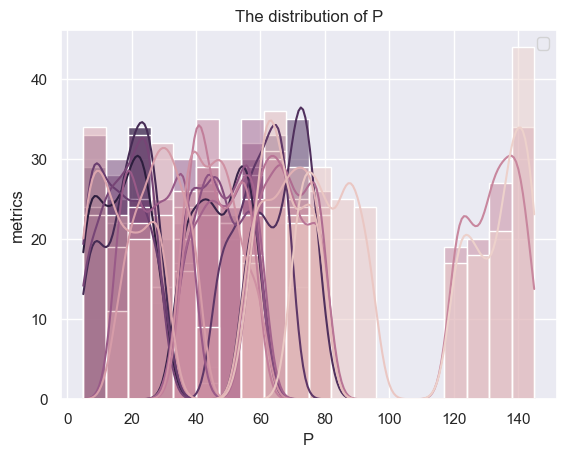

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_28939/355478250.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


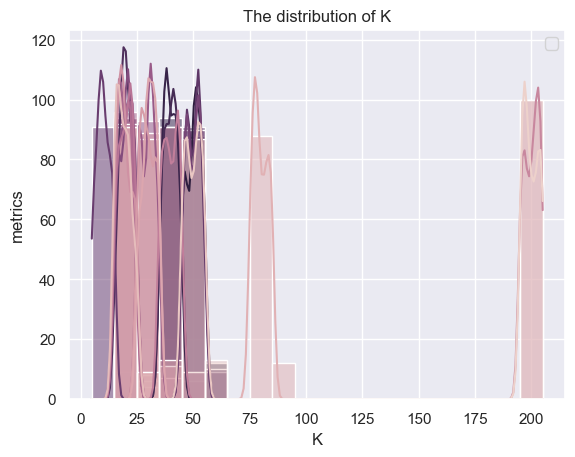

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_28939/355478250.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


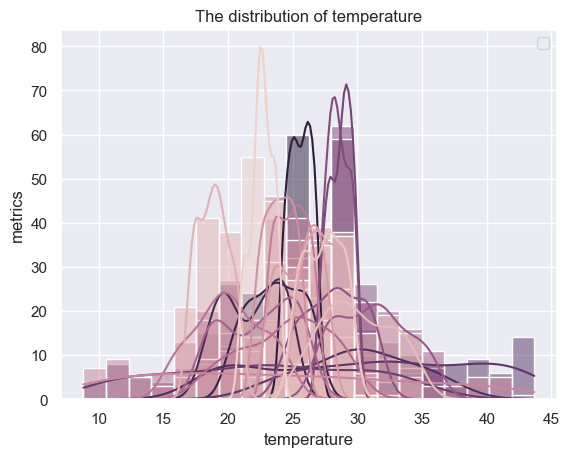

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_28939/355478250.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


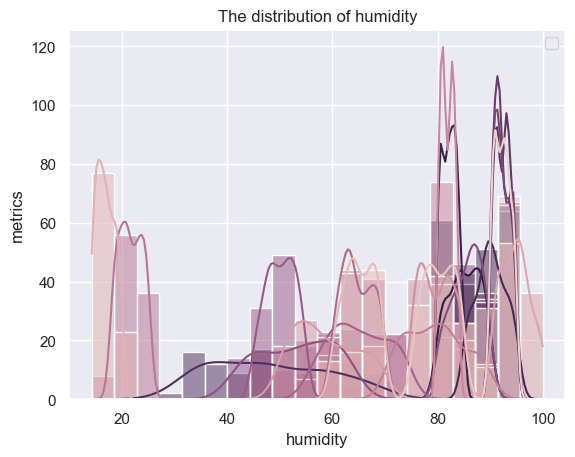

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_28939/355478250.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


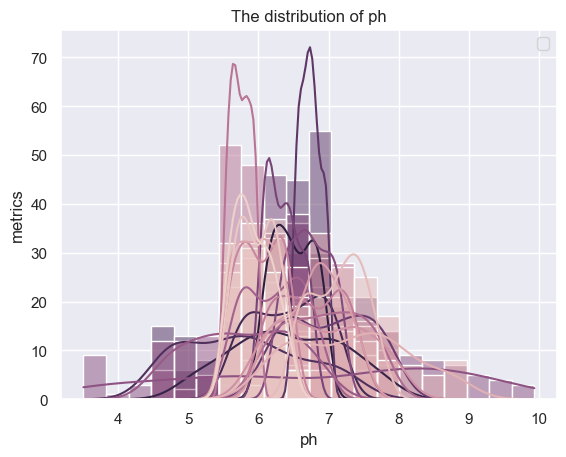

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_28939/355478250.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


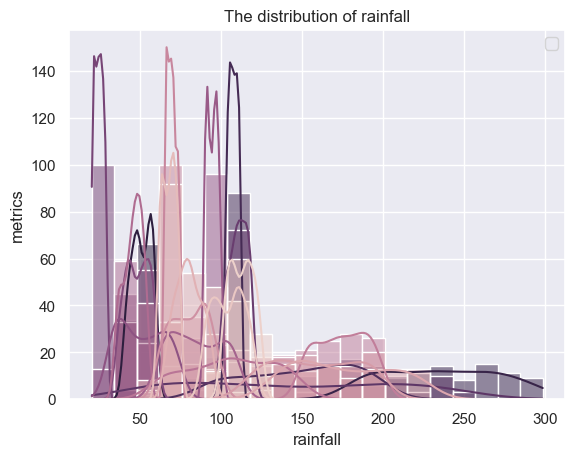

/var/folders/0f/glx6yb212vlc0p67p0phsp180000gn/T/ipykernel_28939/355478250.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


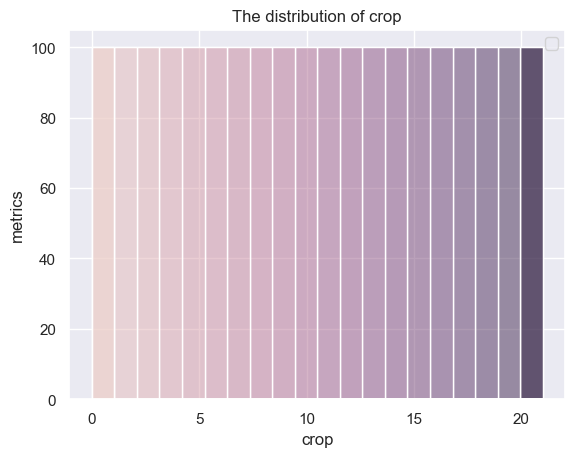

In [25]:

plt.figure(figsize=(10, 6))
for col in crop_df.columns:
    sns.histplot(x=col,data=crop_df,bins=20,kde=True, hue="crop")
    plt.ylabel('metrics')
    plt.title(f'The distribution of {col}')
    plt.legend()
    plt.show()

## Crop and Temperature Data Analysis

Key Observations:

1. **Temperature Range**
- Different crops show distinct temperature preferences
- he temperature values appear to range from approximately 15°C to 40°C
- Most crops cluster within specific temperature bands
2. **Clustering Patterns**
- It confirms the knowledge that some crops are more subject to temperature changes, and they tend to cluster at the same range. 

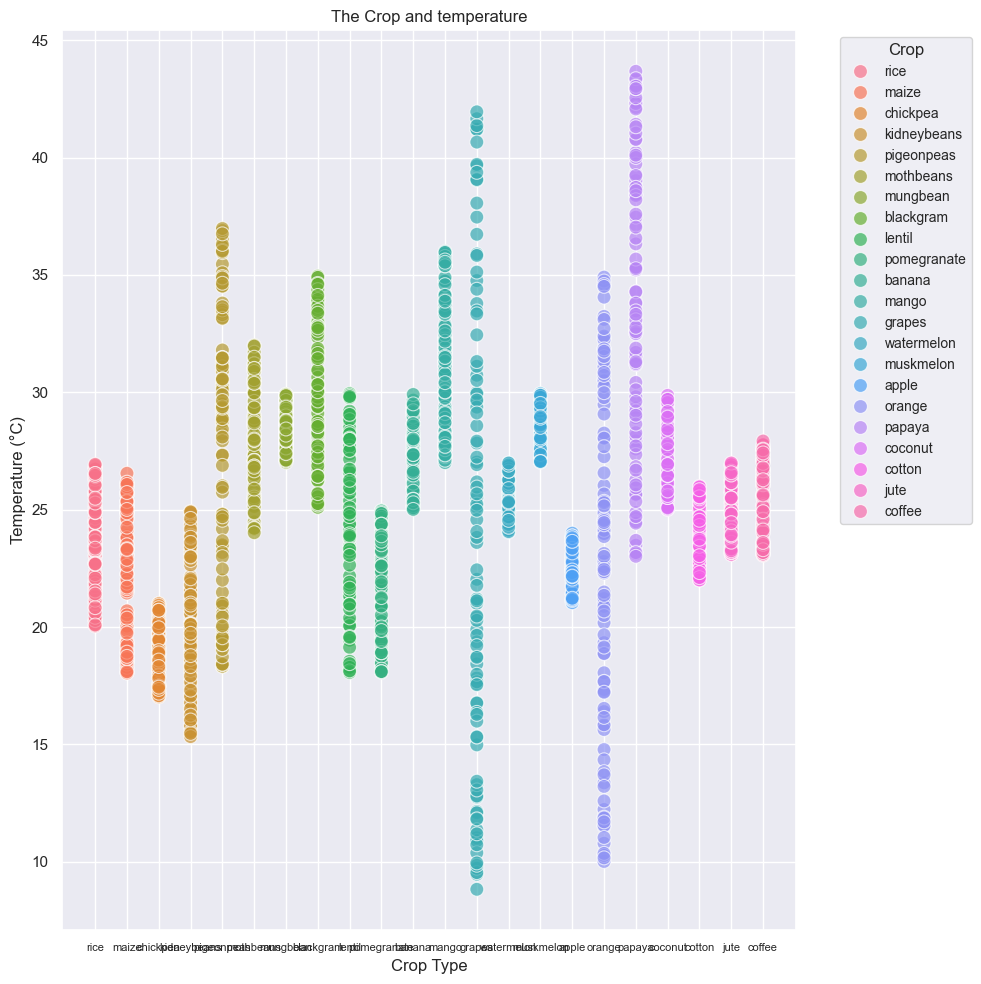

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='label',y='temperature',data=data,hue='label',  s=100, alpha=0.7)
ax.tick_params(axis='x', labelsize=8)
plt.xlabel('Crop Type')
plt.ylabel('Temperature (°C)')
plt.title('The Crop and temperature')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()